In [1]:
import tensorflow as tf
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import pickle
import random
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from sklearn.model_selection import train_test_split

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
DIRECTORY= r'projects/catsvdogs/dogscats/train'

CATEGORIES = ['cats', 'dogs']

img_size=90
data=[]
for category in CATEGORIES:
    folder = os.path.join(DIRECTORY, category)
    label=CATEGORIES.index(category)
    for img in os.listdir(folder):
      img_path=os.path.join(folder,img)
      img_arr=cv2.imread(img_path)
      img_arr=cv2.resize(img_arr, (img_size, img_size))
      data.append([img_arr, label])
len(data) 

23000

In [5]:
random.shuffle(data)

In [6]:
X=[]
Y=[]
for features, labels in data:
  X.append(features)
  Y.append(labels)

In [7]:
X= np.array(X)
Y=np.array(Y)
X=X/255

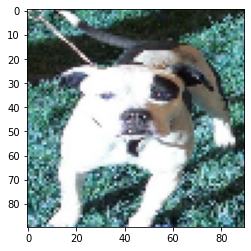

In [8]:
plt.imshow(X[2])

In [9]:
x_train, x_test, y_train, y_test= train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
model= Sequential()
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(units=128 ,input_shape=X.shape[1:],activation='relu'))    
model.add(Dense(units=2,activation='softmax'))

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer='adam',
              metrics=['accuracy'])
hist=model.fit(x_train,y_train,epochs=3, validation_split=0.2)

Epoch 1/3
460/460 [==============================] - 13s 28ms/step - loss: 0.6713 - accuracy: 0.5927 - val_loss: 0.6045 - val_accuracy: 0.6649
Epoch 2/3
319/460 [===================>..........] - ETA: 3s - loss: 0.6141 - accuracy: 0.6601

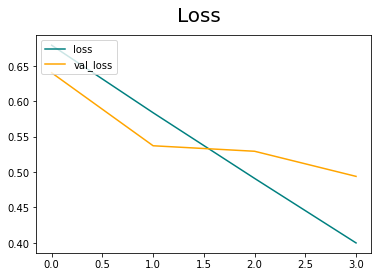

In [13]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [15]:
prediction=model.predict(x_test)

144/144 [==============================] - 1s 10ms/step


Enter the index to be predicted: 56


your img is:-
prediction is:1


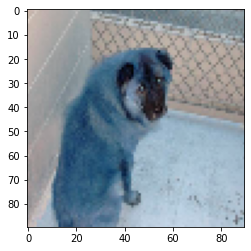

In [20]:
a=input('Enter the index to be predicted:')
A=int(a)
print('your img is:-')
plt.imshow(x_test[A])
print(f'prediction is:{np.argmax(prediction[A])}')

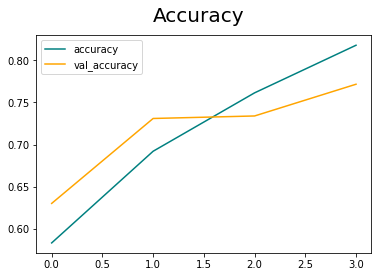

In [21]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()